In [1]:
import numpy as np
from scipy import io

import matplotlib.pyplot as plt
%matplotlib inline

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 13 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 13 days


In [2]:
plt.rcParams.update({'font.size': 12
    , 'legend.markerscale': 1., 'axes.titlesize': 12, 'axes.labelsize' : 12,
      'legend.fontsize' : 10,'legend.handlelength': 3})

plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)

In [3]:
color2 = '#6495ed'
color1 = '#ff6347'
color5 = '#8470ff'
color3 = '#3cb371'
color4 = '#ffd700'
color6 = '#ba55d3'
lw1=3
aph=.7

In [4]:
data_path = './outputs/'
spec = np.load(data_path+"isotropic_ke_spectra_0m.npz")
spec1000 = np.load(data_path+"isotropic_ke_spectra_1000m.npz")
ssh = np.load(data_path+"isotropic_spectrum_eta.npz")

In [5]:
## -2 and -3 slopes in the loglog space
ks = np.array([1.e-3,1])
Es2 = .2e-4*(ks**(-2))
Es3 = .5e-6*(ks**(-3))
rd1 = 22.64 # [km]
Enoise = np.ones(2)*2.*1.e-4

def add_second_axis(ax1):
    """ Add a x-axis at the top of the spectra figures """
    ax2 = ax1.twiny() 
    ax2.set_xscale('log')
    ax2.set_xlim(ax1.axis()[0], ax1.axis()[1])
    kp = 1./np.array([500.,200.,100.,40.,20.,10.,5.])
    lp=np.array([500,200,100,40,20,10,5])
    ax2.set_xticks(kp)
    ax2.set_xticklabels(lp)
    plt.xlabel('Wavelength [km]')

Surface spectrum

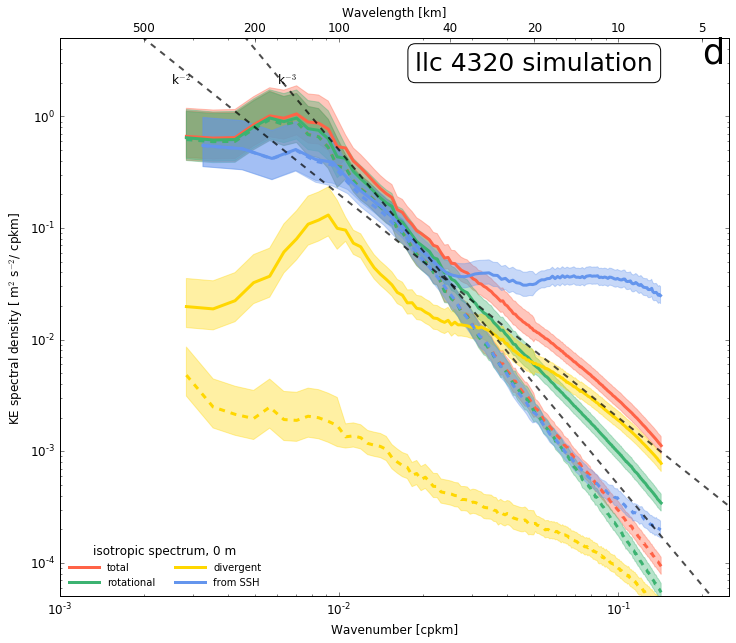

In [6]:
lw,aph=3,.36

fig = plt.figure(facecolor='w', figsize=(12.,10.))
ax1 = fig.add_subplot(111)

ax1.fill_between(spec['k'],spec['El'],spec['Eu'],\
                 color=color1, alpha=aph)
ax1.fill_between(spec['k'],spec['Efl'],spec['Efu'],\
                 color=color1, alpha=aph)
ax1.fill_between(spec['k'],spec['Endl'],spec['Endu'],\
                 color=color3, alpha=aph)
ax1.fill_between(spec['k'],spec['Edl'],spec['Edu'],\
                 color=color4, alpha=aph)
ax1.fill_between(spec['k'],spec['Endfl'],spec['Endfu'],\
                 color=color3, alpha=aph)
ax1.fill_between(spec['k'],spec['Edfl'],spec['Edfu'],\
                 color=color4, alpha=aph)
ax1.fill_between(spec['kg'],spec['Egl'],spec['Egu'],\
                 color=color2, alpha=aph)
ax1.fill_between(spec['kg'],spec['Egfl'],spec['Egfu'],\
                 color=color2, alpha=aph)

ax1.loglog(spec['k'],spec['E'],color=color1,linewidth=lw,
               label=r'total')
ax1.loglog(spec['k'],spec['Ef'],'--',color=color1,linewidth=lw)

ax1.loglog(spec['k'],spec['End'],color=color3,linewidth=lw,
               label=r'rotational')
ax1.loglog(spec['k'],spec['Endf'],'--',color=color3,linewidth=lw)

ax1.loglog(spec['k'],spec['Ed'],color=color4,linewidth=lw,
               label=r'divergent')
ax1.loglog(spec['k'],spec['Edf'],'--',color=color4,linewidth=lw)

ax1.loglog(spec['kg'],spec['Eg'],color=color2,linewidth=lw,
               label=r'from SSH')
ax1.loglog(spec['kg'],spec['Egf'],'--',color=color2,linewidth=lw)

ax1.loglog(ks,Es2,'--', color='k',linewidth=2.,alpha=.7)
ax1.loglog(ks,Es3,'--', color='k',linewidth=2.,alpha=.7)

plt.text(0.0025, 1.941,u'k$^{-2}$')
plt.text(0.0060, 1.951,u'k$^{-3}$')
    
plt.xlabel('Wavenumber [cpkm]')
plt.ylabel(u'KE spectral density [ m$^{2}$ s$^{-2}$/ cpkm]')

plt.text(1./5, 3., "d", size=35, rotation=0.)


plt.text(1./20., 3., "llc 4320 simulation", size=25, rotation=0.,
             ha="center", va="center",
             bbox = dict(boxstyle="round",ec='k',fc='w'))

lg = plt.legend(loc=3,title='isotropic spectrum, 0 m', numpoints=1,ncol=2)
lg.draw_frame(False)

plt.axis((1./1.e3,1./4.,.5/1.e4,5e0))

add_second_axis(ax1)

plt.savefig('figs/iso_spec_model_0m',bbox_inches='tight')

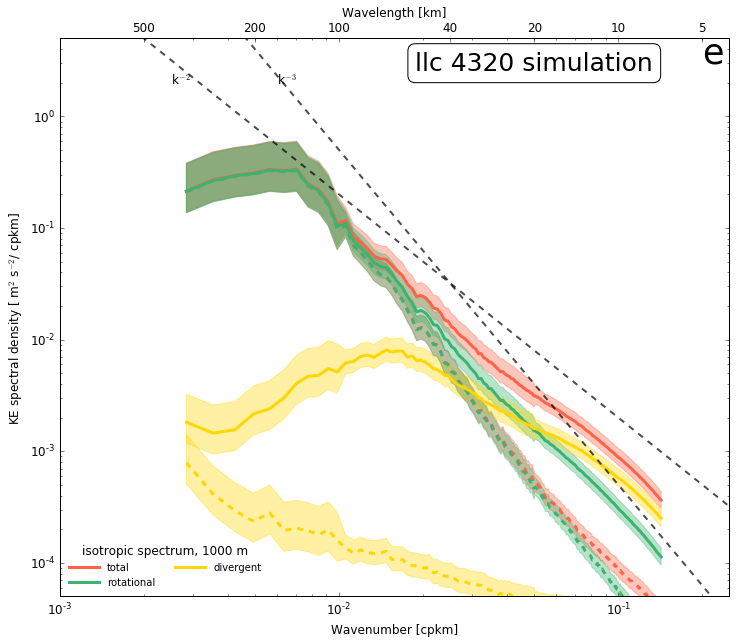

In [7]:
lw,aph=3,.36

fig = plt.figure(facecolor='w', figsize=(12.,10.))
ax1 = fig.add_subplot(111)

ax1.fill_between(spec1000['k'],spec1000['El'],spec1000['Eu'],\
                 color=color1, alpha=aph)
ax1.fill_between(spec1000['k'],spec1000['Efl'],spec1000['Efu'],\
                 color=color1, alpha=aph)
ax1.fill_between(spec1000['k'],spec1000['Endl'],spec1000['Endu'],\
                 color=color3, alpha=aph)
ax1.fill_between(spec1000['k'],spec1000['Edl'],spec1000['Edu'],\
                 color=color4, alpha=aph)
ax1.fill_between(spec1000['k'],spec1000['Endfl'],spec1000['Endfu'],\
                 color=color3, alpha=aph)
ax1.fill_between(spec1000['k'],spec1000['Edfl'],spec1000['Edfu'],\
                 color=color4, alpha=aph)


ax1.loglog(spec1000['k'],spec1000['E'],color=color1,linewidth=lw,
               label=r'total')
ax1.loglog(spec1000['k'],spec1000['Ef'],'--',color=color1,linewidth=lw)

ax1.loglog(spec1000['k'],spec1000['End'],color=color3,linewidth=lw,
               label=r'rotational')
ax1.loglog(spec1000['k'],spec1000['Endf'],'--',color=color3,linewidth=lw)

ax1.loglog(spec1000['k'],spec1000['Ed'],color=color4,linewidth=lw,
               label=r'divergent')
ax1.loglog(spec1000['k'],spec1000['Edf'],'--',color=color4,linewidth=lw)


ax1.loglog(ks,Es2,'--', color='k',linewidth=2.,alpha=.7)
ax1.loglog(ks,Es3,'--', color='k',linewidth=2.,alpha=.7)
plt.text(0.0025, 1.941,u'k$^{-2}$')
plt.text(0.0060, 1.951,u'k$^{-3}$')
    
plt.xlabel('Wavenumber [cpkm]')
plt.ylabel(u'KE spectral density [ m$^{2}$ s$^{-2}$/ cpkm]')

plt.text(1./5, 3., "e", size=35, rotation=0.)


plt.text(1./20., 3., "llc 4320 simulation", size=25, rotation=0.,
             ha="center", va="center",
             bbox = dict(boxstyle="round",ec='k',fc='w'))

lg = plt.legend(loc=3,title='isotropic spectrum, 1000 m', numpoints=1,ncol=2)
lg.draw_frame(False)

plt.axis((1./1.e3,1./4.,.5/1.e4,5e0))


add_second_axis(ax1)

plt.savefig('figs/iso_spec_model_1000m',bbox_inches='tight')

# SSH variance spectrum
The SSH variance spectrum of hourly fields presents a "break" at about 40 km; the shape of the spectrum  changes from about $\kappa^{-5}$ to $\kappa^{-1}$. We attribute this signigicant spectral flattening to the contribution of unbalanced flows, likely dominated by inertia-gravity waves. These motions are very incoherent. Removing tidal frequencies using a python implementation of T_TIDE does not affect the spectrum at small scales; tidal motions are dominated by barotropic tides and project onto very large scales. 

Filtering out all fast flows by daily-averaging supress most of the high-wavenumber variance. The spectrum of filtered motions is consistent with predictions of isotropic interior QG turbulence.

In [8]:
import seaborn as sns
#sns.set(style="darkgrid")
sns.set(style="whitegrid")

from pyspec import spectrum
from plots_aux import *

/Users/crocha/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 13 days


In [9]:
lw = 1.
aph=.35

sn = 11
L = 1./ssh['k']
f1 = L > 100.
f2 = (L<=100.)&(L>20.)
f3 = L<=20.

SN = np.zeros_like(ssh['k'])
SN[f1],SN[f2],SN[f3] = sn, 4*sn,8*sn
Y = np.ones_like(SN)*.25e-4

win = np.hanning(spec['k'].size)
fac = (spec['k'].size/(win**2).sum())

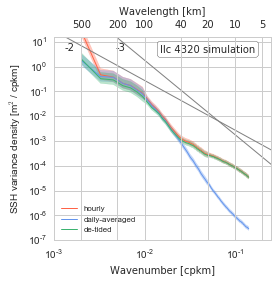

In [10]:
fig = plt.figure(figsize=(8.27/2-.25,11.69/3-.25))
ax1 = fig.add_subplot(111)

ax1.fill_between(ssh['k'],fac*ssh['El'],fac*ssh['Eu'],\
                 color=color1, alpha=aph)
ax1.fill_between(ssh['k'],fac*ssh['Efl'],fac*ssh['Efu'],\
                 color=color2, alpha=aph)
ax1.fill_between(ssh['k'],fac*ssh['Edt_l'],fac*ssh['Edt_u'],\
                 color=color3, alpha=aph)

ax1.loglog(ssh['k'],fac*ssh['E'],color=color1,linewidth=lw,
               label=r'hourly')
ax1.loglog(ssh['k'],fac*ssh['Ef'],color=color2,linewidth=lw,
               label=r'daily-averaged')
ax1.loglog(ssh['k'],fac*ssh['Edt'],color=color3,linewidth=lw,
               label=r'de-tided')


ax1.loglog(ks,Es2,'-', color='0.5',linewidth=1.)
ax1.loglog(ks,Es3,'-', color='0.5',linewidth=1.)

plt.text(0.0013, 4.25,u'-2')
plt.text(0.00475, 4.25,u'-3')
   
    
plt.xlabel('Wavenumber [cpkm]')
plt.ylabel(u'SSH variance density [m$^{2}$ / cpkm]')

#plt_spec_error(x=ssh['k'],y=Y,sn=SN)

lg = plt.legend(loc=3,title='', numpoints=1,ncol=1)
lg.draw_frame(False)

plt.text(1./20., 5, "llc 4320 simulation", size=10, rotation=0.,
             ha="center", va="center",
             bbox = dict(boxstyle="round",ec='k',fc='w'))
plt.axis((1./1.e3,1./4.,1./1.e7,1.6e1))

add_second_axis(ax1)

plt.savefig('figs/iso_spec_model_ssh',bbox_inches='tight')
plt.savefig('figs/iso_spec_model_ssh.eps',bbox_inches='tight')
plt.savefig('figs/iso_spec_model_ssh.pdf',bbox_inches='tight')

In [20]:
Etot = np.load("Eiso_uv_small_100m.npz")
Ed = np.load("Eiso_uv_small_daily_average_100m.npz")
#GM = np.load("../GM/gm_Ctot.npz")
GM = io.loadmat('/Users/crocha/Dropbox/research/comparisons/GarrettMunkMatlab-master/GM_southern-ocean_npf.mat',squeeze_me=True,struct_as_record=False)

# E0 is the level of energy in the GM specrtrum
# somehow arbitrary, but according to Munk&Garrent
# maybe universal within a factor of 2. Here 
# twice the orignal value seems to work best.
E0 = 1.4

kgm, Egm = GM['k'], GM['EGM']
fgm = (kgm>.5e-3)&(kgm<1.)
kgm, Egm = kgm[fgm], E0*Egm[fgm]

kiso, Eiso = Etot['K_w'], Etot['Ew']
kd, Ed = Ed['K_w'], Ed['Ew']

fi = (1./kiso > 5.)
kiso, Eiso = kiso[fi],  Eiso[fi]
kd, Ed = kd[fi],  Ed[fi]

fi = (1./kiso < 450.)
kiso, Eiso = kiso[fi],  Eiso[fi]
kd, Ed = kd[fi],  Ed[fi]


Eld = Eiso-Ed

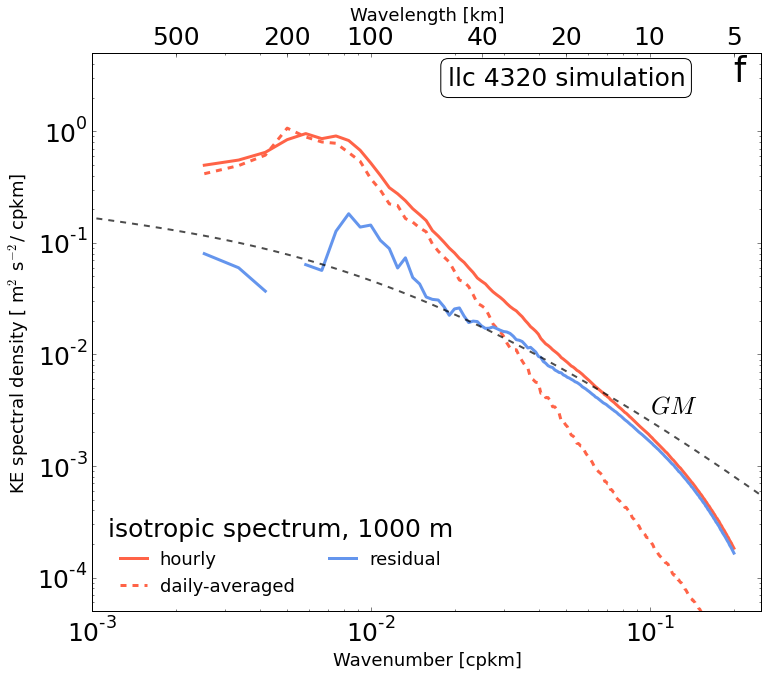

In [27]:
lw,aph=3,.36

fig = plt.figure(facecolor='w', figsize=(12.,10.))
ax1 = fig.add_subplot(111)

ax1.loglog(kiso,Eiso,color=color1,linewidth=lw,
               label=r'hourly')

ax1.loglog(kd,Ed,'--',color=color1,linewidth=lw,label=r'daily-averaged')

ax1.loglog(kd,Eld,color=color2,linewidth=lw,label=r'residual')

ax1.loglog(kgm,Egm,'--', color='k',linewidth=2.,alpha=.7)
ax1.text(0.1, .3e-2,u'$GM$')
    
plt.xlabel('Wavenumber [cpkm]')
plt.ylabel(u'KE spectral density [ m$^{2}$ s$^{-2}$/ cpkm]')

#plt.text(0.7, 4.5, "a", size=35, rotation=0.)


plt.text(1./20., 3., "llc 4320 simulation", size=25, rotation=0.,
             ha="center", va="center",
             bbox = dict(boxstyle="round",ec='k',fc='w'))

lg = plt.legend(loc=3,title='isotropic spectrum, 1000 m', numpoints=1,ncol=2)
lg.draw_frame(False)

plt.axis((1./1.e3,1./4.,.5/1.e4,5e0))

plt.text(1./5, 2.8, "f", size=35, rotation=0.)



add_second_axis(ax1)

plt.savefig('figs/iso_spec_model_100m_gm',bbox_inches='tight')